In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [3]:
data, colors = datasets.make_swiss_roll(n_samples=5000,
                                        noise=0.0,
                                        random_state=None)

In [4]:
pca = PCA(n_components=2)
pca_transform = pca.fit_transform(data)

In [5]:
tsne = TSNE(n_components=2)
tsne_transform = tsne.fit_transform(data)

In [6]:
random_vectors = np.random.random(size=(3, 2))
random_projection = np.matmul(data, random_vectors)

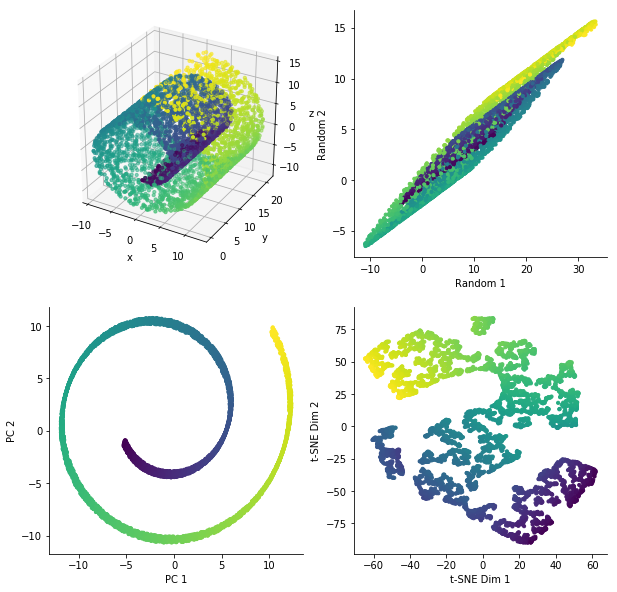

In [7]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(221, projection='3d')
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

ax1.scatter(data[:, 0],
            data[:, 1],
            data[:, 2],
            c=colors,
            s=10)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')

ax2.scatter(random_projection[:, 0],
            random_projection[:, 1],
            c=colors,
            s=10)
ax2.set_xlabel('Random 1')
ax2.set_ylabel('Random 2')

ax3.scatter(pca_transform[:, 0],
            pca_transform[:, 1],
            c=colors, s=10)
ax3.set_xlabel('PC 1')
ax3.set_ylabel('PC 2')

ax4.scatter(tsne_transform[:, 0],
            tsne_transform[:, 1],
            c=colors, s=10)
ax4.set_xlabel('t-SNE Dim 1')
ax4.set_ylabel('t-SNE Dim 2')

for ax in [ax2, ax3, ax4]:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

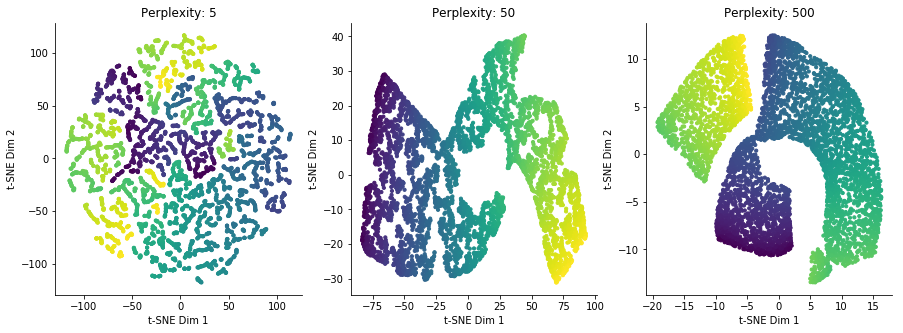

In [8]:
perplexities = [5, 50, 500]

fig = plt.figure(figsize=(15, 5))
for perp_idx, perp in enumerate(perplexities):
    tsne = TSNE(n_components=2, perplexity=perp)
    tsne_transform = tsne.fit_transform(data)
    
    plt.subplot(1, 3, perp_idx + 1)
    ax = plt.gca()
    ax.scatter(tsne_transform[:, 0],
               tsne_transform[:, 1],
               c=colors, s=10)
    ax.set_xlabel('t-SNE Dim 1')
    ax.set_ylabel('t-SNE Dim 2')
    ax.set_title('Perplexity: %.0f' % perp)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)